In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

### Reading the given titanic dataset

In [2]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Filtering out the required features from the dataframe

In [3]:
titanic = titanic[['pclass','sex','age','sibsp','survived']]
titanic.head()

,pclass,sex,age,sibsp,survived
0,1st,female,29.0000,0,1
1,1st,male,0.9167,1,1
2,1st,female,2.0000,1,0
3,1st,male,30.0000,1,0
4,1st,female,25.0000,1,0


### Checking for missing values and filling them with the average of the same feature

In [4]:
check = titanic.isnull().sum()
check

pclass        0
sex           0
age         263
sibsp         0
survived      0
dtype: int64

In [5]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['age'].isna().sum()

0

### LabelEncoding some of the features

In [6]:
le = preprocessing.LabelEncoder()
titanic['pclass']= le.fit_transform(titanic['pclass'])
titanic['sex']=le.fit_transform(titanic['sex'])

In [7]:
titanic['pclass'].unique()

array([0, 1, 2])

In [8]:
titanic['sex'].unique()

array([0, 1])

### Defining X and y (target variable) from the dataset

In [9]:
X = titanic.drop('survived',axis=1)
y = titanic['survived']

### Splitting dataset into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Section 2 - Fitting Decision Tree Model and plotting the tree

In [11]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

In [12]:
dtc.classes_       #checking the classes

array([0, 1], dtype=int64)

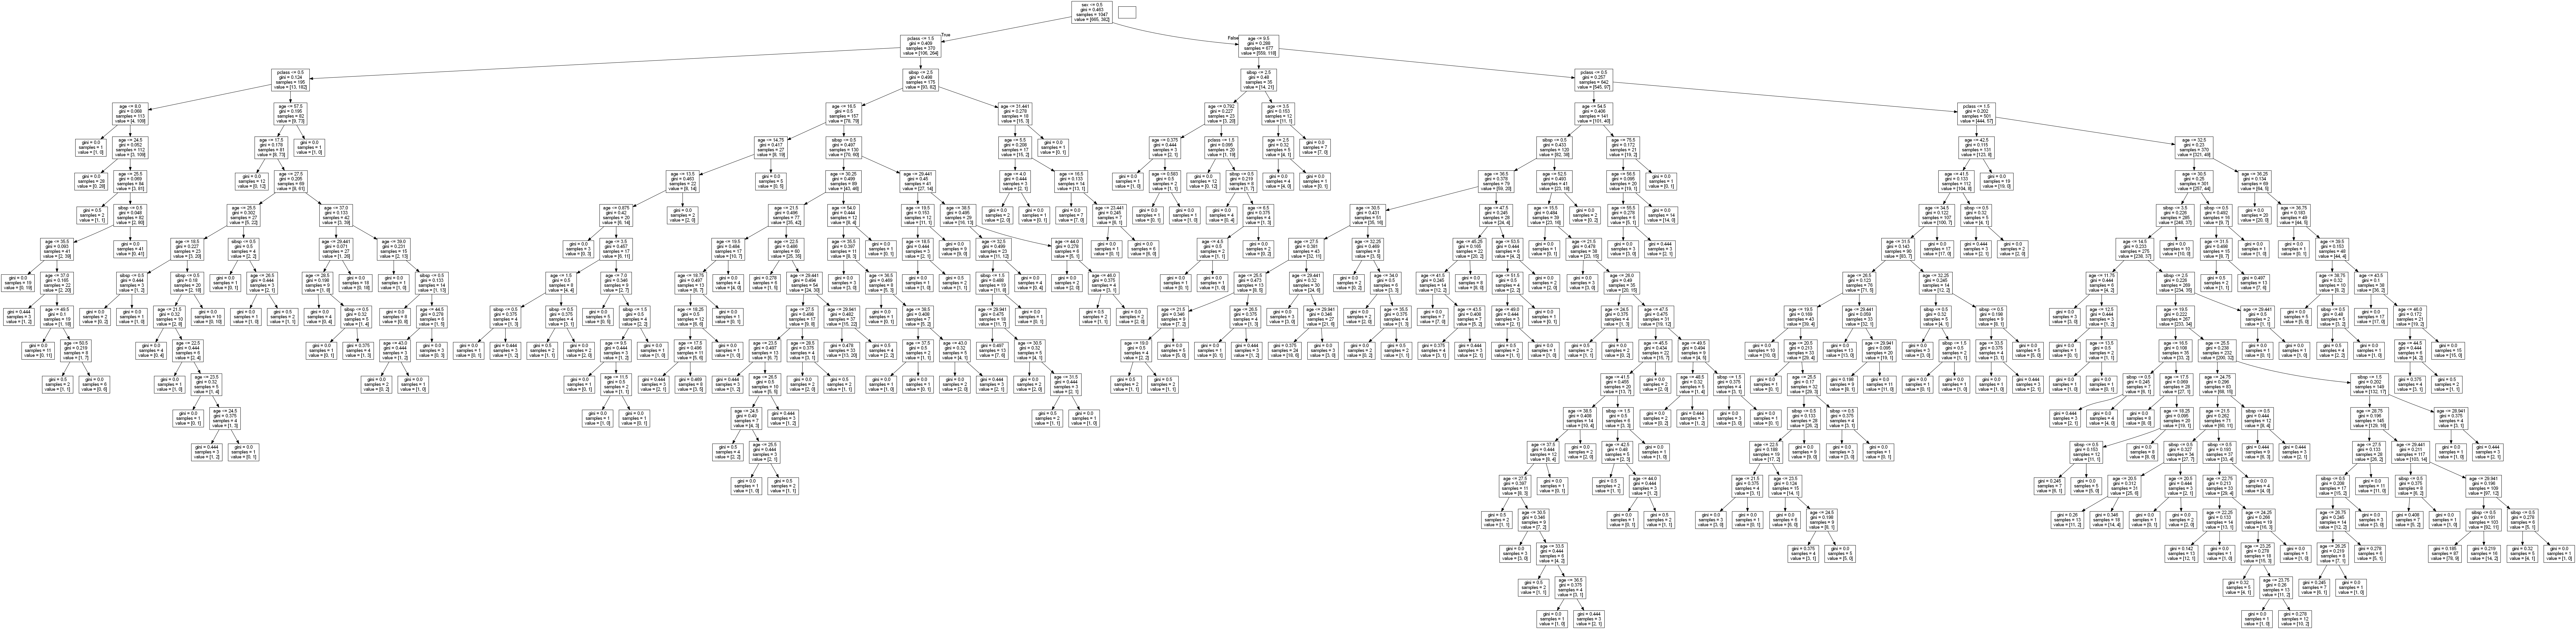

In [13]:
data = export_graphviz(dtc, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

## Section 3 - Using GridSearchCV() to find the best parameter max_leaf_nodes

In [14]:
param_dict = {
    'max_leaf_nodes': range(5,100)
}

In [39]:
grid = GridSearchCV(dtc,
                    param_grid = param_dict,
                    cv = 4,
                    verbose=1,
                    n_jobs = -1
)

In [40]:
grid.fit(X_train,y_train)

Fitting 4 folds for each of 95 candidates, totalling 380 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(5, 100)}, verbose=1)

In [41]:
grid.best_params_

{'max_leaf_nodes': 42}

In [42]:
x = grid.best_params_['max_leaf_nodes']

### Plotting the pruned tree

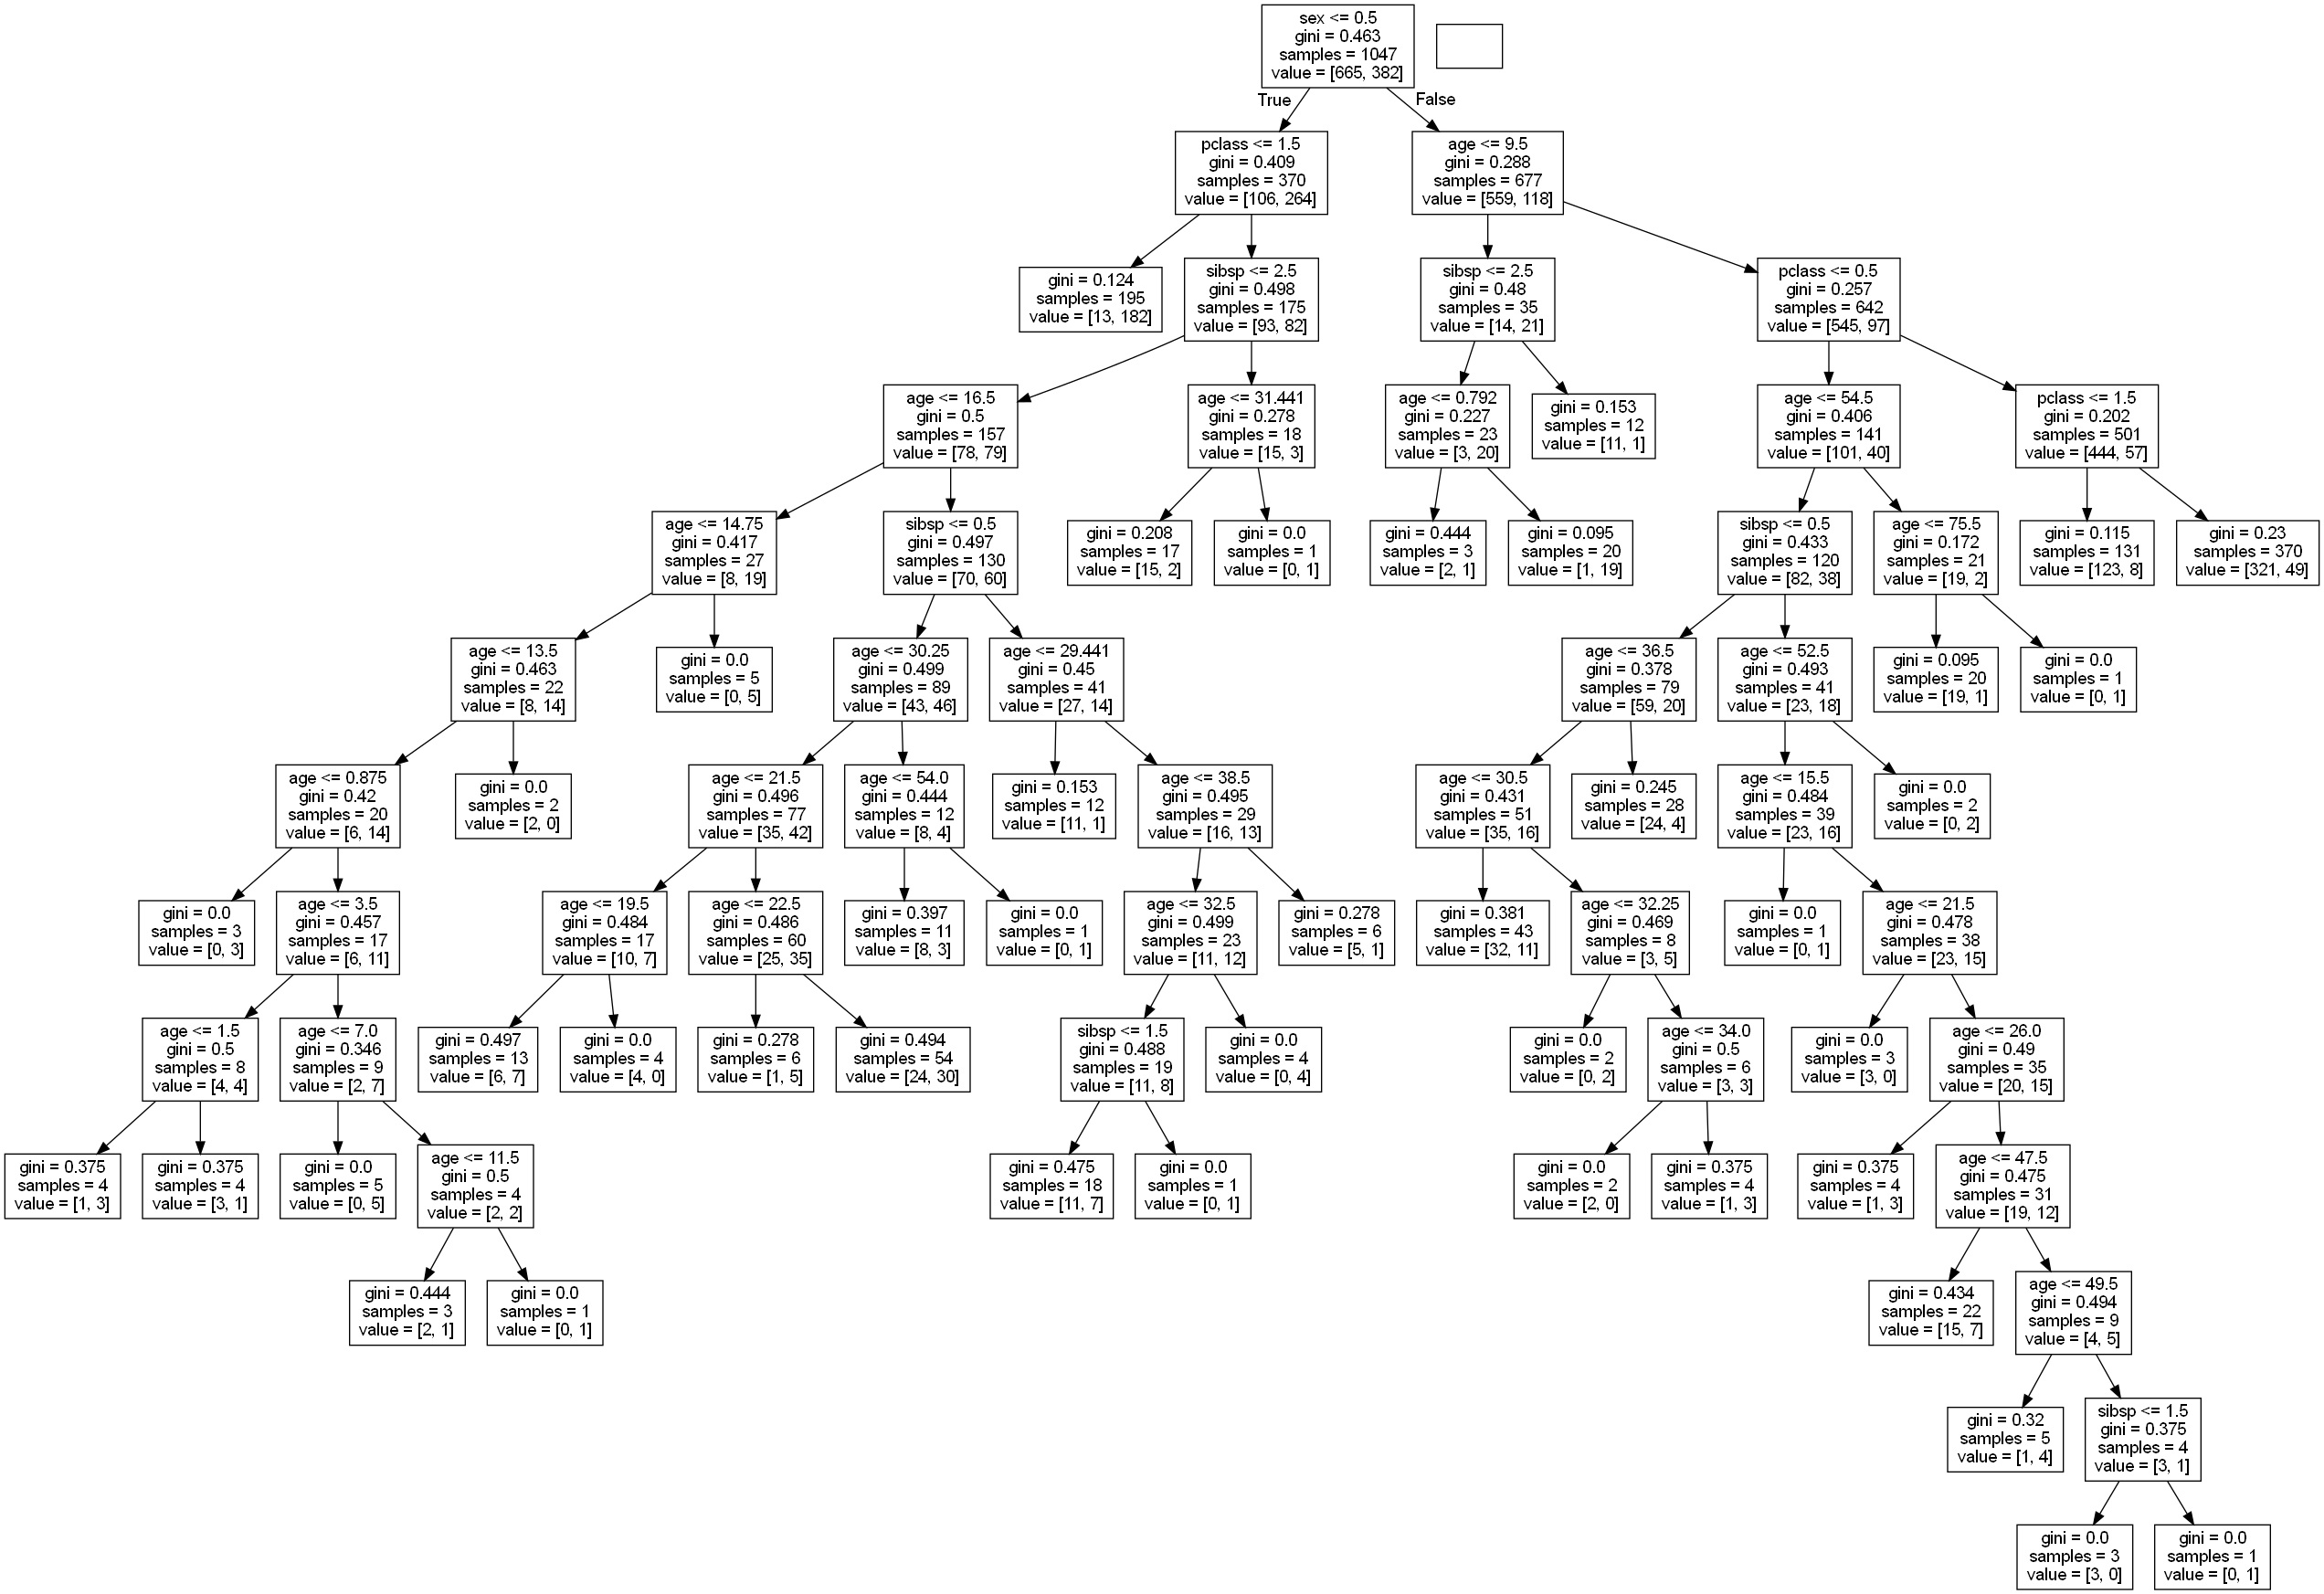

In [43]:
data = export_graphviz(grid.best_estimator_, out_file=None,feature_names=X_train.columns)
graph_grid = pydotplus.graph_from_dot_data(data)
Image(graph_grid.create_png())

## Section 4 - Report accuracy on test set

In [44]:
y_pred = grid.predict(X_test)

In [45]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)
TN = confusion_matrix_[0][0]
FN = confusion_matrix_[1][0]
TP = confusion_matrix_[1][1]
FP = confusion_matrix_[0][1]
survivors_percent = (TP/(TP+FN))*100
fatalities_percent = (TN/(FP+TN))*100

In [46]:
print("Percent survivors correctly predicted (on test set - )",survivors_percent)
print("Percent fatalities correctly predicted (on test set - )",fatalities_percent)

Percent survivors correctly predicted (on test set - ) 61.016949152542374
Percent fatalities correctly predicted (on test set - ) 89.58333333333334


In [47]:
print("The classification report is as follows: \n",classification_report(y_test,y_pred))

The classification report is as follows: 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       144
           1       0.83      0.61      0.70       118

    accuracy                           0.77       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.78      0.77      0.76       262



## Section 5 - Random Forest Classifier function

In [48]:
rfc = RandomForestClassifier(n_estimators = 50,max_leaf_nodes = x)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
TN = confusion_matrix_rfc[0][0]
FN = confusion_matrix_rfc[1][0]
TP = confusion_matrix_rfc[1][1]
FP = confusion_matrix_rfc[0][1]
survivors_percent_rfc = (TP/(TP+FN))*100
fatalities_percent_rfc = (TN/(FP+TN))*100

In [37]:
print("Percent survivors correctly predicted (on test set) - ",survivors_percent_rfc)
print("Percent fatalities correctly predicted (on test set) - ",fatalities_percent_rfc)

Percent survivors correctly predicted (on test set) -  48.30508474576271
Percent fatalities correctly predicted (on test set) -  94.44444444444444


In [38]:
print("The classification report is as follows: \n",classification_report(y_test,y_pred_rfc))

The classification report is as follows: 
               precision    recall  f1-score   support

           0       0.69      0.94      0.80       144
           1       0.88      0.48      0.62       118

    accuracy                           0.74       262
   macro avg       0.78      0.71      0.71       262
weighted avg       0.77      0.74      0.72       262



#### Conclusion - We can see a  a slight increase in the percent fatalities correctly predicted. 